In [1]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1
from scipy.optimize import least_squares
import copy
from numba import jit
import multiprocessing
import time

In [2]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [81]:
#Loads data and TheoryPredictor class from file in fits folder

fileIn = 'fits/11_01_mean.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj, thresh=0.03)

pas/211101_2000


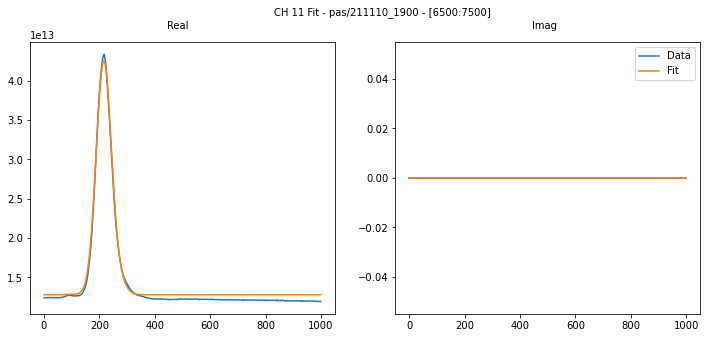

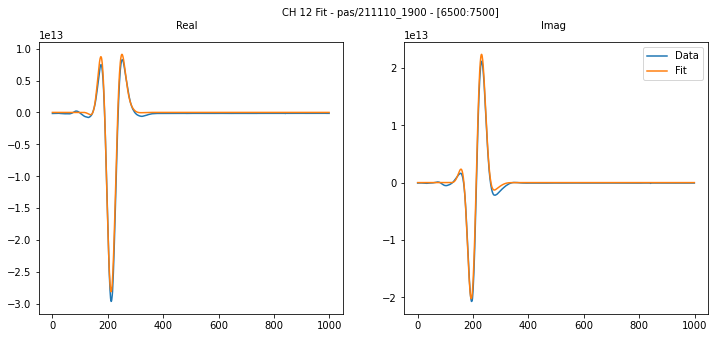

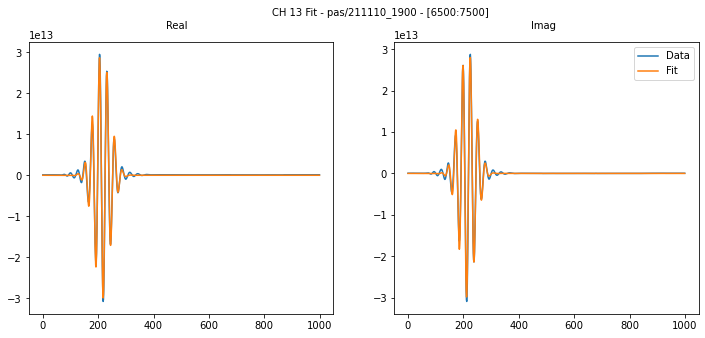

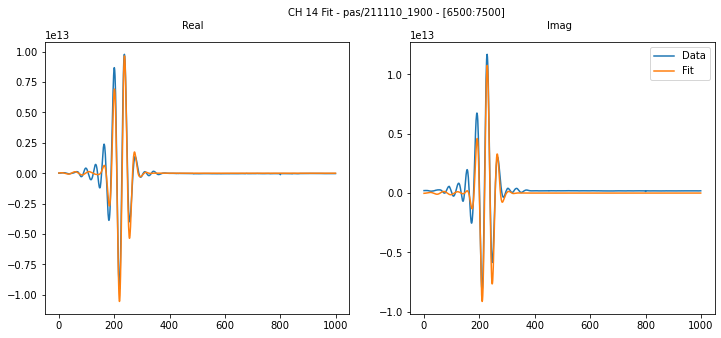

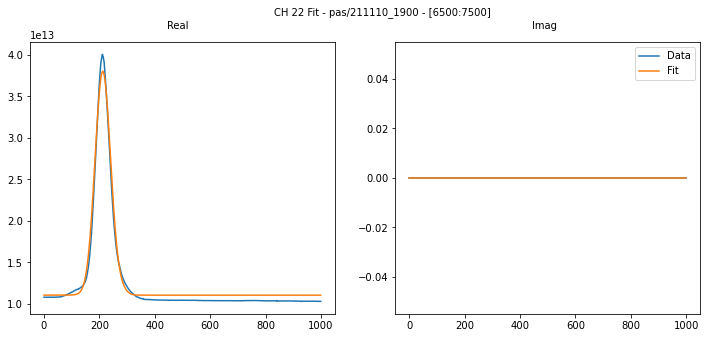

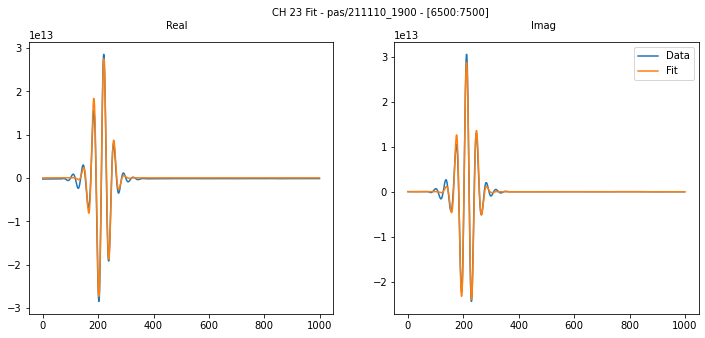

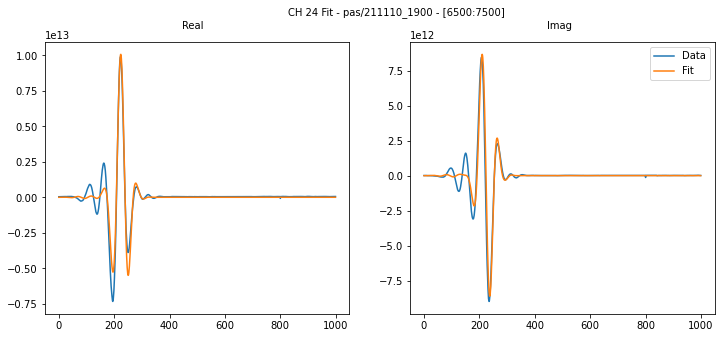

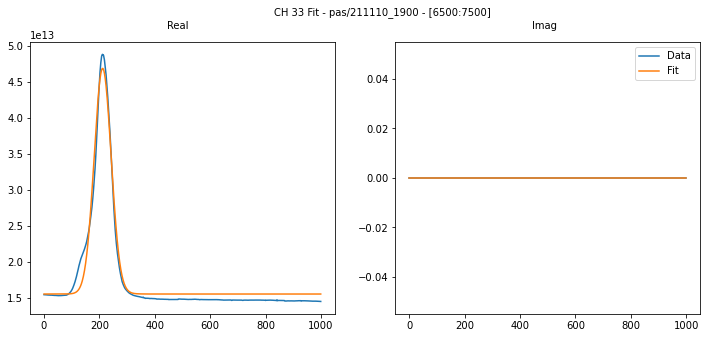

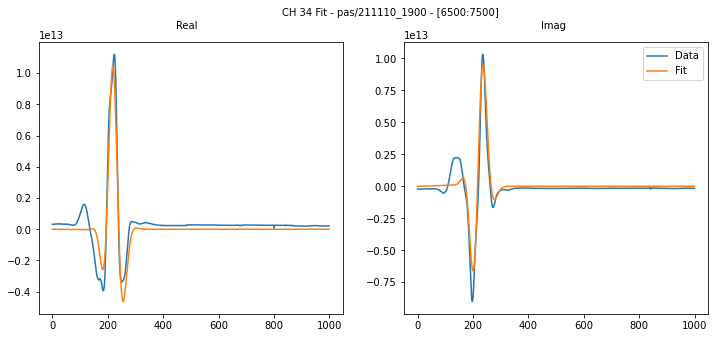

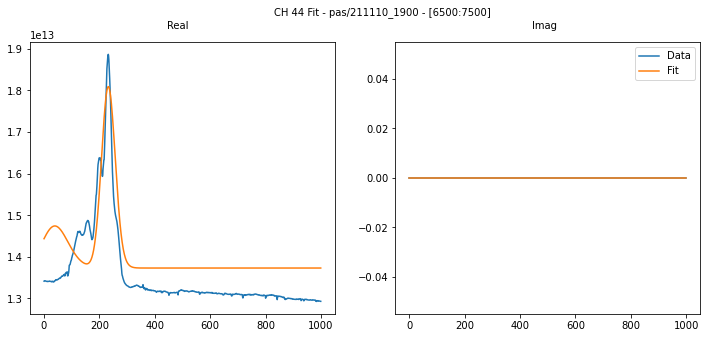

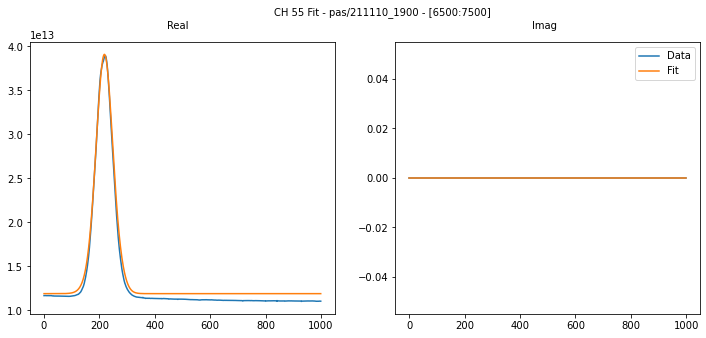

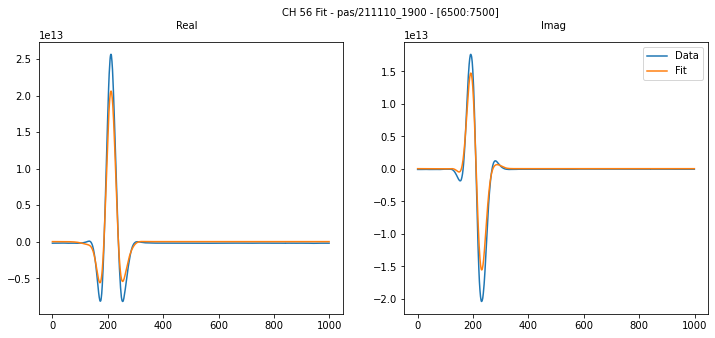

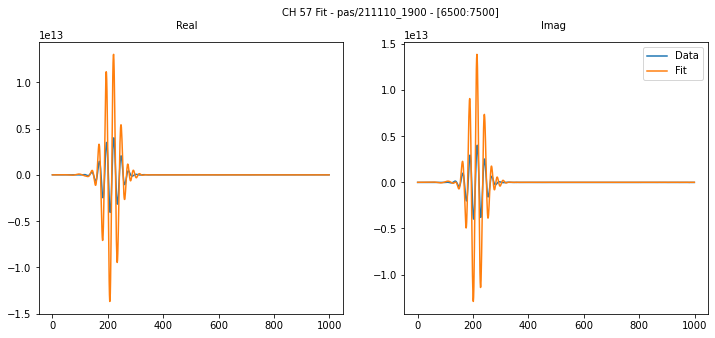

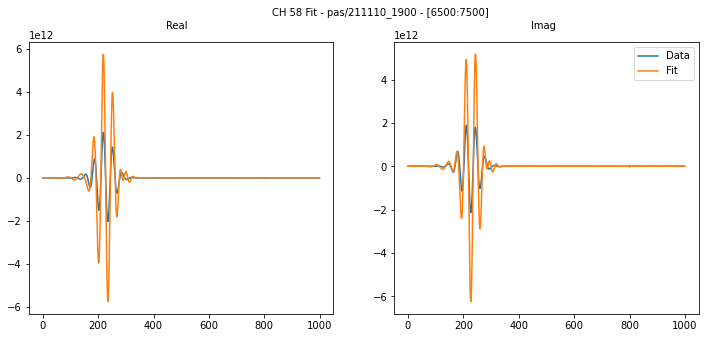

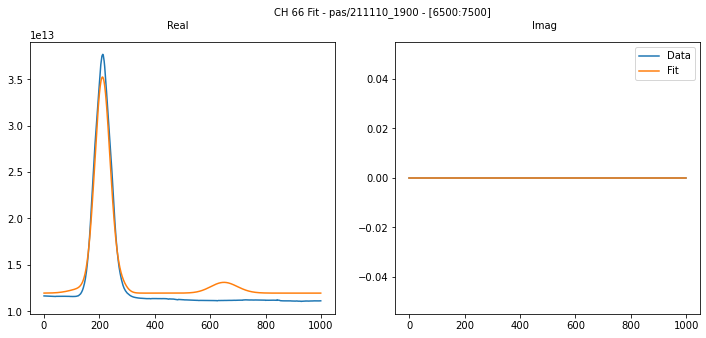

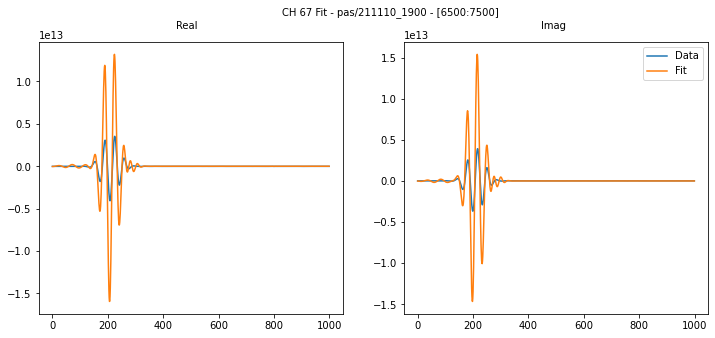

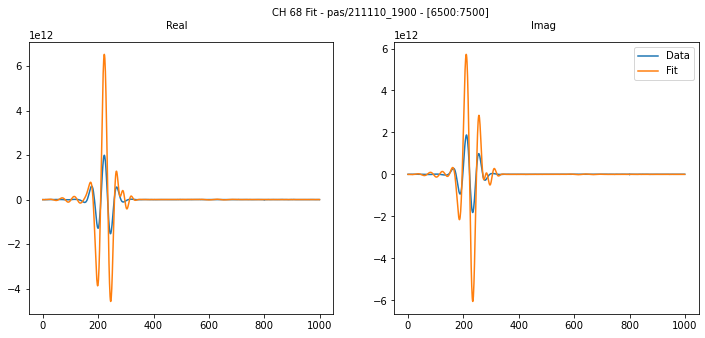

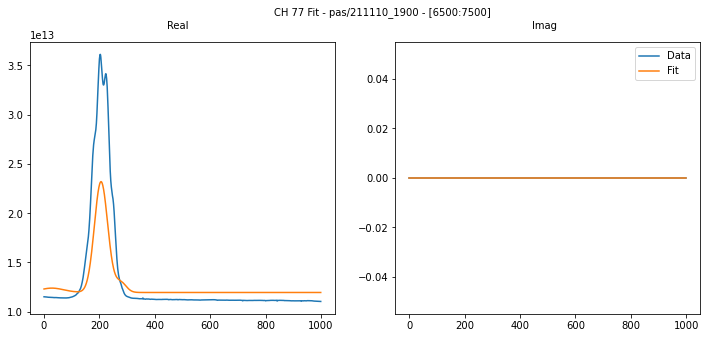

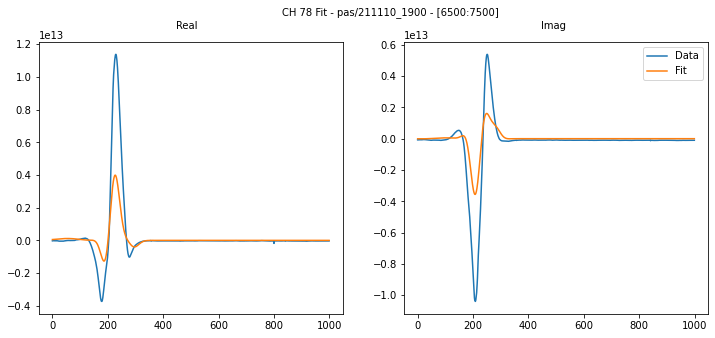

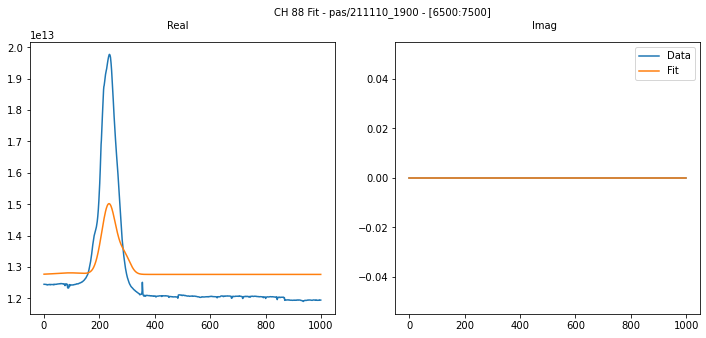

In [82]:
#Graphs theory predictions vs data

cut = [6500,7500]
channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
mode = 'all'

Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=False)

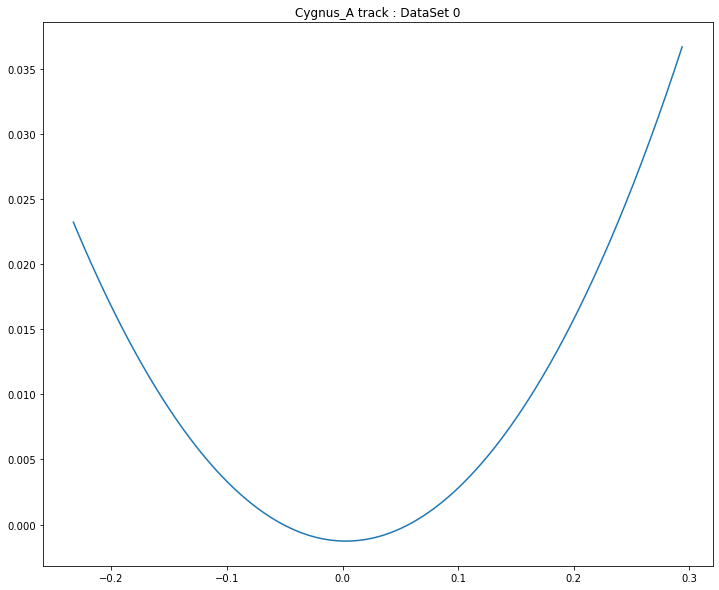

In [83]:
#Plots the track of radio sources

cut = [9000,10000]
sats=['Cygnus_A']

Theory.trackPlot(cut=cut,sats=sats)

In [84]:
#Returns the averaged geometry parameters of a list of files

keys = ['D{}_pos_x','D{}_pos_y','D{}_phi_0','D{}_beam_center_x','D{}_beam_center_y','D{}_beam_smooth_x','D{}_beam_smooth_y']
files = ['11_01_big.txt','11_02_big.txt','11_03_big.txt','11_04_big.txt','11_05_big.txt','11_06_big.txt','11_07_big.txt','11_08_big.txt','11_09_big.txt','11_10_big.txt']
params = []
for file in files:
    f = open('fits/'+file,'r')
    startData = f.read()
    f.close()
    exec(startData)
    params.append([[startParams[k.format(j)] for k in keys] for j in range(1,9)])
params = np.array(params)
averages = np.mean(params,axis=0)
print(averages)
avgParams = {}
for i in range(1,9):
    for j,k in enumerate(keys):
        avgParams[k.format(i)] = averages[i-1,j]
print(avgParams)

[[ 0.00000000e+00  4.00000000e+00  0.00000000e+00  9.95296393e-03
  -1.47124285e-02  4.52880290e-02  4.39770711e-02]
 [ 4.40092638e+00 -4.93309140e-01 -1.78730251e-01  1.48198386e-02
  -1.89124766e-02  4.19910051e-02  4.51432289e-02]
 [ 1.35839405e-01 -4.80682214e+00 -3.69838651e-01  2.37019795e-04
  -1.18382644e-02  4.28498821e-02  5.56733882e-02]
 [-3.72782667e+00 -2.94091680e-01 -7.09124201e-01 -4.32660360e-02
   1.09091038e-02  5.81128385e-02  3.72508112e-02]
 [ 0.00000000e+00  4.00000000e+00  0.00000000e+00  2.35706268e-02
  -1.81030516e-02  4.92009161e-02  4.06584193e-02]
 [ 4.40241703e+00  4.39048945e-01  2.21084978e+00  2.54215975e-02
  -2.28809620e-02  5.19907427e-02  3.72304343e-02]
 [ 1.54794294e-01 -4.35219570e+00  1.66314248e+00 -4.75294962e-03
  -1.38618542e-02  6.41762012e-02  3.99582355e-02]
 [-4.35692278e+00 -1.80507869e-01  1.04604692e-01 -3.97351936e-02
   1.68942109e-02  5.70276376e-02  3.87262832e-02]]
{'D1_pos_x': 0.0, 'D1_pos_y': 4.0, 'D1_phi_0': 0.0, 'D1_beam_ce